# Bayesian statistics problem set 2 (2025)

Florent Leclercq,<br/>
Institut d'Astrophysique de Paris,<br/>
florent.leclercq@iap.fr

See <a href="https://cloud.aquila-consortium.org/s/2025_ProblemSet2">this document</a> for the exercise statement and <a href="https://cloud.aquila-consortium.org/s/2025_ProblemSet2Solution">this document</a> for a solution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad, cumulative_trapezoid as cumtrapz
np.random.seed(0)

In [2]:
plt.rcParams.update({'lines.linewidth': 2})
plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble': r"\usepackage{amsmath}\usepackage{upgreek}"})
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 15})
dir="./plots/ProblemSet2/"
!mkdir -p $dir

## The slope of the number counts of radio sources

In [3]:
def ln_posterior(alpha,n,S_0,S_1):
    return n*np.log(alpha-1)+n*(alpha-1)*np.log(S_0)-alpha*np.log(S_1)

alphas=np.linspace(1+1e-4,12,100)
S_0=1
posterior=np.exp(ln_posterior(alphas, 1, S_0, 2*S_0))
posterior /= np.trapz(posterior,alphas)

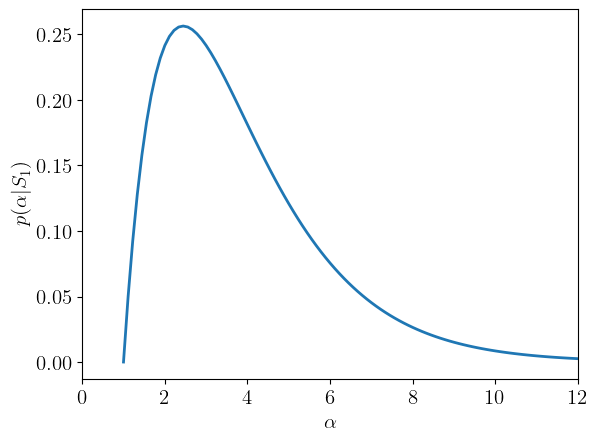

In [4]:
plt.xlim(0, 12)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$p(\alpha|S_1)$")
plt.plot(alphas, posterior)
plt.savefig(dir+'slope_radio_sources.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig(dir+'slope_radio_sources.png',dpi=100,bbox_inches="tight")
plt.show()

## Bayesian linear model: experimental design, hierarchy, and prediction

### Bayesian experimental design

In [5]:
m=0.8
x0,x1=0.18,0.32
y0,y1=m*x0,m*x1
Xe,Ye=0.95,m*0.95+0.1
tau_e=sigma=0.1
mbar=(x0*y0+x1*y1)/(sigma**2+x0**2+x1**2)
F=1+(x0**2+x1**2)/sigma**2

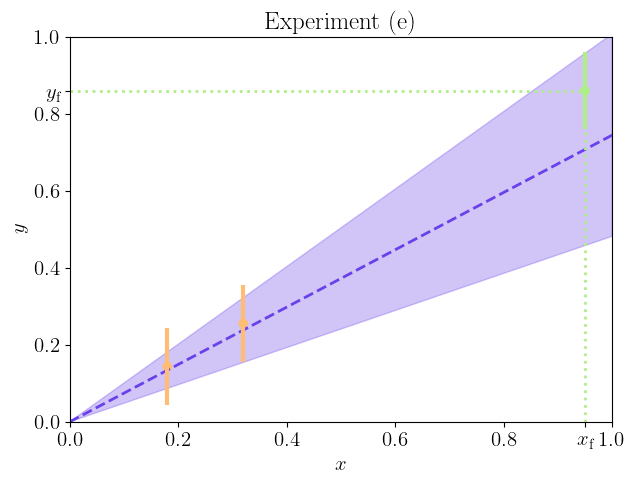

In [6]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.plot([0.,1.],[0.,mbar], ls='--', color='#6941eb', linewidth=2)
ax.fill_between([0.,1.],[0.,mbar-1./np.sqrt(F)],[0.,mbar+1./np.sqrt(F)], ls="", color='#6941eb', alpha=0.30, linewidth=2)
ax.plot([0.,Xe],[Ye,Ye], ls=':', color='#b0ee89', linewidth=2)
ax.plot([Xe,Xe],[0.,Ye], ls=':', color='#b0ee89', linewidth=2)
ax.scatter([Xe], [Ye], ls='', color='#b0ee89', linewidth=2)
ax.errorbar([Xe], [Ye], yerr=sigma, ls='', ms=100, color='#b0ee89', linewidth=3)
ax.scatter([x0], [y0], ls='', color='#ffbc75', linewidth=2)
ax.scatter([x1], [y1], ls='', color='#ffbc75', linewidth=2)
ax.errorbar([x0,x1], [y0,y1], yerr=sigma, ls='', ms=100, color='#ffbc75', linewidth=3)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
xticks,xticklabels=list(ax.get_xticks()), list(ax.get_xticklabels())
ax.set_xticks(xticks + [Xe])
ax.set_xticklabels(xticklabels + ["$x_\mathrm{f}$"])
yticks,yticklabels=list(ax.get_yticks()), list(ax.get_yticklabels())
ax.set_yticks(yticks + [Ye])
ax.set_yticklabels(yticklabels + ["$y_\mathrm{f}$"])
ax.set_title("Experiment (e)")
plt.savefig(dir+'BED_experiment_e.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig(dir+'BED_experiment_e.png',dpi=100,bbox_inches="tight")
plt.show()

In [7]:
y_star = 0.55
Delta = 0.1
Xa,Ya=0.75,m*0.75-0.01
tau_star=sigma/2

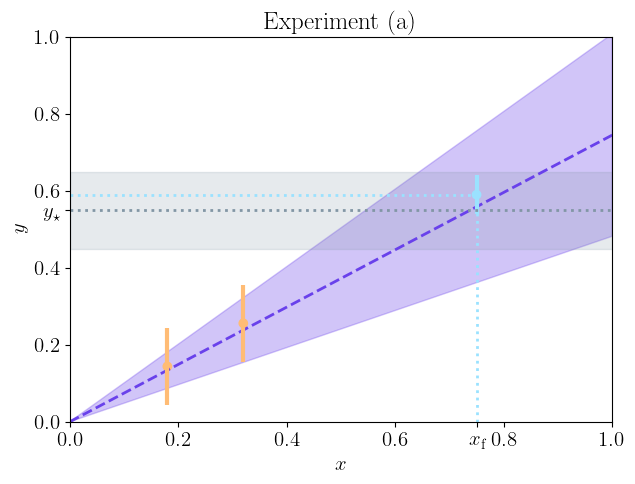

In [8]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.plot([0.,1.],[0.,mbar], ls='--', color='#6941eb', linewidth=2)
ax.fill_between([0.,1.],[0.,mbar-1./np.sqrt(F)],[0.,mbar+1./np.sqrt(F)], ls="", color='#6941eb', alpha=0.30, linewidth=2)
ax.plot([0.,Xa],[Ya,Ya], ls=':', color='#9ae2ff', linewidth=2)
ax.plot([Xa,Xa],[0.,Ya], ls=':', color='#9ae2ff', linewidth=2)
ax.scatter([Xa], [Ya], ls='', color='#9ae2ff', linewidth=2, zorder=2)
ax.errorbar([Xa], [Ya], yerr=tau_star, ls='', ms=100, color='#9ae2ff', linewidth=3, zorder=2)
ax.plot([0,1],[y_star,y_star], ls=":", color="#8296a5", linewidth=2)
ax.fill_between([0,1],[y_star-Delta,y_star-Delta],[y_star+Delta,y_star+Delta], color="#8296a5", alpha=0.2)
ax.scatter([x0], [y0], ls='', color='#ffbc75', linewidth=2)
ax.scatter([x1], [y1], ls='', color='#ffbc75', linewidth=2)
ax.errorbar([x0,x1], [y0,y1], yerr=sigma, ls='', ms=100, color='#ffbc75', linewidth=3)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
xticks,xticklabels=list(ax.get_xticks()), list(ax.get_xticklabels())
ax.set_xticks(xticks + [Xa])
ax.set_xticklabels(xticklabels + ["$x_\mathrm{f}$"])
yticks,yticklabels=list(ax.get_yticks()), list(ax.get_yticklabels())
ax.set_yticks(yticks + [y_star])
ax.set_yticklabels(yticklabels + ["$y_\star$"])
ax.set_title("Experiment (a)")
plt.savefig(dir+'BED_experiment_a.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig(dir+'BED_experiment_a.png',dpi=100,bbox_inches="tight")
plt.show()

In [9]:
def U_e(xf,F,tau_e):
  return F+xf**2/tau_e**2

def U_a(xf,F,tau_star,mbar,ystar,Delta):
  Sigma=1./np.sqrt(F)
  Delta_y=Sigma*xf
  return F+xf**2/tau_star**2*np.exp(-(mbar*xf-ystar)**2/(Delta**2+Delta_y**2))*Delta/np.sqrt(Delta**2+Delta_y**2)

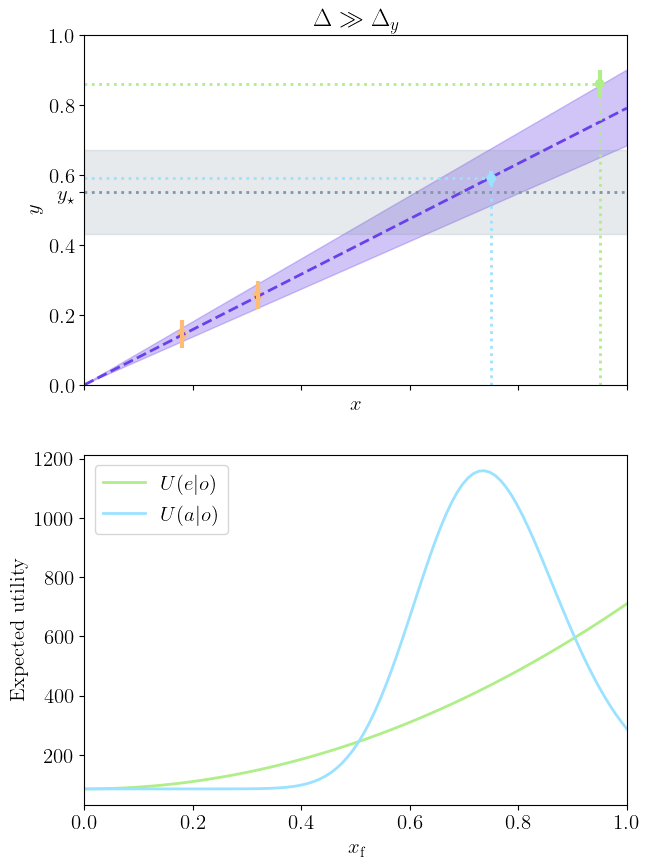

In [10]:
tau_e=sigma=0.04
mbar=(x0*y0+x1*y1)/(sigma**2+x0**2+x1**2)
F=1+(x0**2+x1**2)/sigma**2
Delta=3*sigma
tau_star=sigma/2

fig, (ax0,ax1) = plt.subplots(2, 1, figsize=(7, 10), sharex=True)

xs=np.linspace(0,1,100)
ax0.set_xlim(0, 1)
ax0.set_ylim(0, 1)
ax0.plot([0.,1.],[0.,mbar], ls='--', color='#6941eb', linewidth=2)
ax0.fill_between([0.,1.],[0.,mbar-1./np.sqrt(F)],[0.,mbar+1./np.sqrt(F)], ls="", color='#6941eb', alpha=0.30, linewidth=2)
ax0.plot([0.,Xe],[Ye,Ye], ls=':', color='#b0ee89', linewidth=2)
ax0.plot([Xe,Xe],[0.,Ye], ls=':', color='#b0ee89', linewidth=2)
ax0.scatter([Xe], [Ye], ls='', color='#b0ee89', linewidth=2)
ax0.errorbar([Xe], [Ye], yerr=sigma, ls='', ms=100, color='#b0ee89', linewidth=3)

ax0.plot([0.,Xa],[Ya,Ya], ls=':', color='#9ae2ff', linewidth=2)
ax0.plot([Xa,Xa],[0.,Ya], ls=':', color='#9ae2ff', linewidth=2)
ax0.scatter([Xa], [Ya], ls='', color='#9ae2ff', linewidth=2, zorder=2)
ax0.errorbar([Xa], [Ya], yerr=tau_star, ls='', ms=100, color='#9ae2ff', linewidth=3, zorder=2)

ax0.plot([0,1],[y_star,y_star], ls=":", color="#8296a5", linewidth=2)
ax0.fill_between([0,1],[y_star-Delta,y_star-Delta],[y_star+Delta,y_star+Delta], color="#8296a5", alpha=0.2)
ax0.scatter([x0], [y0], ls='', color='#ffbc75', linewidth=2)
ax0.scatter([x1], [y1], ls='', color='#ffbc75', linewidth=2)
ax0.errorbar([x0,x1], [y0,y1], yerr=sigma, ls='', ms=100, color='#ffbc75', linewidth=3)
yticks,yticklabels=list(ax0.get_yticks()), list(ax0.get_yticklabels())
ax0.set_yticks(yticks + [y_star])
ax0.set_yticklabels(yticklabels + ["$y_\star$"])
ax0.set_xlabel('$x$')
ax0.set_ylabel('$y$')

ax1.plot(xs, U_e(xs,F,tau_e), ls='-', color='#b0ee89', linewidth=2, label="$U(e|o)$")
ax1.plot(xs, U_a(xs,F,tau_star,mbar,y_star,Delta), ls='-', color='#9ae2ff', linewidth=2, label="$U(a|o)$")
ax1.legend(loc='best')

ax1.set_xlabel('$x_\mathrm{f}$')
ax1.set_ylabel('Expected utility')
ax0.set_title("$\Delta \gg \Delta_y$")
plt.savefig(dir+'BED_utility_1.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig(dir+'BED_utility_1.png',dpi=100,bbox_inches="tight")
plt.show()

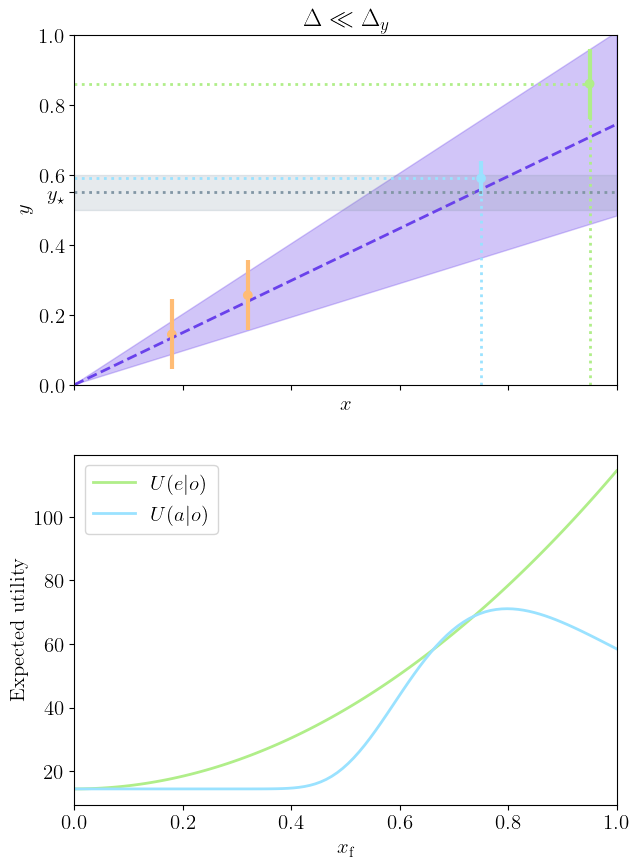

In [11]:
tau_e=sigma=0.1
mbar=(x0*y0+x1*y1)/(sigma**2+x0**2+x1**2)
F=1+(x0**2+x1**2)/sigma**2
Delta=sigma/2
tau_star=sigma/2

fig, (ax0,ax1) = plt.subplots(2, 1, figsize=(7, 10), sharex=True)

xs=np.linspace(0,1,100)
ax0.set_xlim(0, 1)
ax0.set_ylim(0, 1)
ax0.plot([0.,1.],[0.,mbar], ls='--', color='#6941eb', linewidth=2)
ax0.fill_between([0.,1.],[0.,mbar-1./np.sqrt(F)],[0.,mbar+1./np.sqrt(F)], ls="", color='#6941eb', alpha=0.30, linewidth=2)
ax0.plot([0.,Xe],[Ye,Ye], ls=':', color='#b0ee89', linewidth=2)
ax0.plot([Xe,Xe],[0.,Ye], ls=':', color='#b0ee89', linewidth=2)
ax0.scatter([Xe], [Ye], ls='', color='#b0ee89', linewidth=2)
ax0.errorbar([Xe], [Ye], yerr=sigma, ls='', ms=100, color='#b0ee89', linewidth=3)

ax0.plot([0.,Xa],[Ya,Ya], ls=':', color='#9ae2ff', linewidth=2)
ax0.plot([Xa,Xa],[0.,Ya], ls=':', color='#9ae2ff', linewidth=2)
ax0.scatter([Xa], [Ya], ls='', color='#9ae2ff', linewidth=2, zorder=2)
ax0.errorbar([Xa], [Ya], yerr=tau_star, ls='', ms=100, color='#9ae2ff', linewidth=3, zorder=2)

ax0.plot([0,1],[y_star,y_star], ls=":", color="#8296a5", linewidth=2)
ax0.fill_between([0,1],[y_star-Delta,y_star-Delta],[y_star+Delta,y_star+Delta], color="#8296a5", alpha=0.2)
ax0.scatter([x0], [y0], ls='', color='#ffbc75', linewidth=2)
ax0.scatter([x1], [y1], ls='', color='#ffbc75', linewidth=2)
ax0.errorbar([x0,x1], [y0,y1], yerr=sigma, ls='', ms=100, color='#ffbc75', linewidth=3)
yticks,yticklabels=list(ax0.get_yticks()), list(ax0.get_yticklabels())
ax0.set_yticks(yticks + [y_star])
ax0.set_yticklabels(yticklabels + ["$y_\star$"])
ax0.set_xlabel('$x$')
ax0.set_ylabel('$y$')

ax1.plot(xs, U_e(xs,F,tau_e), ls='-', color='#b0ee89', linewidth=2, label="$U(e|o)$")
ax1.plot(xs, U_a(xs,F,tau_star,mbar,y_star,Delta), ls='-', color='#9ae2ff', linewidth=2, label="$U(a|o)$")
ax1.legend(loc='best')

ax1.set_xlabel('$x_\mathrm{f}$')
ax1.set_ylabel('Expected utility')
ax0.set_title("$\Delta \ll \Delta_y$")
plt.savefig(dir+'BED_utility_2.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig(dir+'BED_utility_2.png',dpi=100,bbox_inches="tight")
plt.show()

### Bayesian hierarchical model

In [12]:
X,Y=1.0,1.5
sigma_x,sigma_y=0.1,0.12

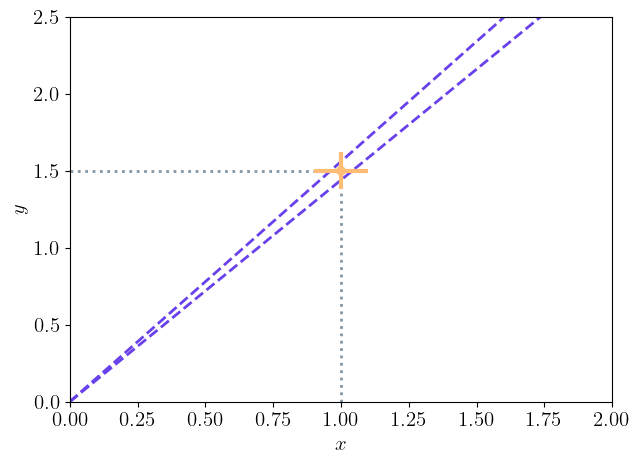

In [13]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.set_xlim(0, X+1)
ax.set_ylim(0, Y+1)
ax.plot([0.,2.5],[0.,3.9], ls='--', color='#6941eb', linewidth=2)
ax.plot([0.,2.5],[0.,3.6], ls='--', color='#6941eb', linewidth=2)
ax.plot([0.,X],[Y,Y], ls=':', color='#8296a5', linewidth=2)
ax.plot([X,X],[0.,Y], ls=':', color='#8296a5', linewidth=2)
ax.scatter([X], [Y], ls='', color='#ffbc75', linewidth=2)
ax.errorbar([X], [Y], xerr=sigma_x, yerr=sigma_y, ls='', ms=100, color='#ffbc75', linewidth=3)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.savefig(dir+'BHM_illustration.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig(dir+'BHM_illustration.png',dpi=100,bbox_inches="tight")
plt.show()

In [14]:
def p_of_m_given_XY(m,X,Y,sigma_x,sigma_y):
  return sigma_x*sigma_y/np.sqrt(sigma_y**2+m**2*sigma_x**2) * np.exp(-(Y-m*X)**2/(2*(sigma_y**2+m**2*sigma_x**2)))

p_of_m_given_XY(1.1,X,Y,sigma_x,sigma_y)

0.0036014768529003863

In [15]:
# Normalize the pdf.
m=np.linspace(1.,2.5,1000)
p=p_of_m_given_XY(m,X,Y,sigma_x,sigma_y)
norm = np.trapz(p, m)
pdf = p / norm

# Compute the mean.
m_mean = np.trapz(m * pdf, m)
print(f"Mean: {m_mean:.4f}")

# Compute the cumulative distribution function (CDF).
# We assume that x is sorted in ascending order.
cdf = np.cumsum(pdf) * (m[1] - m[0])  # approximate integration assuming small dx

# Ensure the CDF goes from 0 to 1.
cdf = cdf / cdf[-1]

# Compute the credible intervals using linear interpolation.
def find_quantile(q, x, cdf):
    """Find the x-value at which the CDF reaches the quantile q."""
    return np.interp(q, cdf, x)

# For the 68% credible interval (central), we remove 16% on each tail.
m_lower_68 = find_quantile(0.16, m, cdf)
m_upper_68 = find_quantile(0.84, m, cdf)

# For the 95% credible interval (central), remove 2.5% on each tail.
m_lower_95 = find_quantile(0.025, m, cdf)
m_upper_95 = find_quantile(0.975, m, cdf)

print(f"68% credible interval: ({m_lower_68:.4f}, {m_upper_68:.4f})")
print(f"95% credible interval: ({m_lower_95:.4f}, {m_upper_95:.4f})")

Mean: 1.5317
68% credible interval: (1.3342, 1.7267)
95% credible interval: (1.1818, 1.9732)


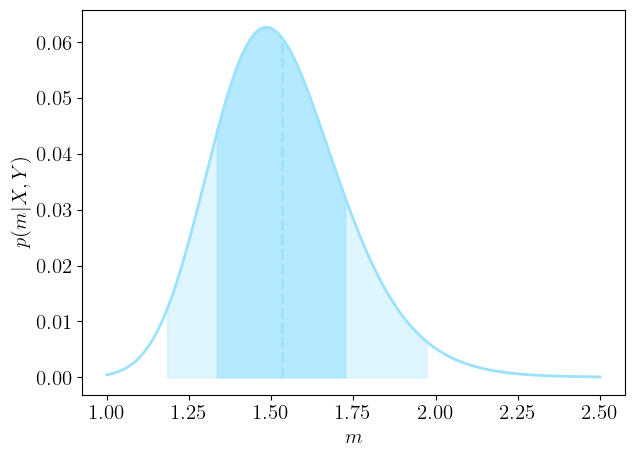

In [16]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(m,p, color="#9ae2ff", lw=2)
ax.plot([m_mean,m_mean],[0,p_of_m_given_XY(m_mean,X,Y,sigma_x,sigma_y)], color="#9ae2ff", ls="--", lw=2)
foo=np.where((m>m_lower_68)*(m<m_upper_68))[0]
ax.fill_between(m[foo],p[foo]*0.,p[foo], color="#9ae2ff", alpha=0.6)
foo=np.where((m>m_lower_95)*(m<m_upper_95))[0]
ax.fill_between(m[foo],p[foo]*0.,p[foo], color="#9ae2ff", alpha=0.3)
ax.set_xlabel('$m$')
ax.set_ylabel('$p(m|X,Y)$')
plt.savefig(dir+'BHM_posterior_slope.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig(dir+'BHM_posterior_slope.png',dpi=100,bbox_inches="tight")
plt.show()

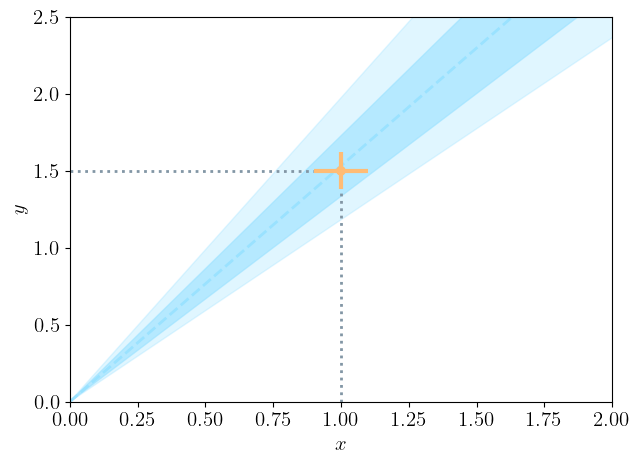

In [17]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.set_xlim(0, X+1)
ax.set_ylim(0, Y+1)
ax.plot([0.,X],[Y,Y], ls=':', color='#8296a5', linewidth=2)
ax.plot([X,X],[0.,Y], ls=':', color='#8296a5', linewidth=2)
ax.plot([0,4.],[0,4.*m_mean], color="#9ae2ff", ls="--", lw=2)
ax.fill_between([0,4.],[0,4.*m_lower_68],[0,4.*m_upper_68], color="#9ae2ff", alpha=0.6)
ax.fill_between([0,4.],[0,4.*m_lower_95],[0,4.*m_upper_95], color="#9ae2ff", alpha=0.3)
ax.scatter([X], [Y], ls='', color='#ffbc75', linewidth=2, zorder=2)
ax.errorbar([X], [Y], xerr=sigma_x, yerr=sigma_y, ls='', ms=100, color='#ffbc75', linewidth=3, zorder=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.savefig(dir+'BHM_slope_with_uncertainty.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig(dir+'BHM_slope_with_uncertainty.png',dpi=100,bbox_inches="tight")
plt.show()

In [18]:
def p_of_xm_given_XY(x, m, X, Y, sigma_x, sigma_y):
    return np.exp(
        -0.5 * (
            ((X - x)**2) / (sigma_x**2) +
            ((Y - m*x)**2) / (sigma_y**2)
        )
    )

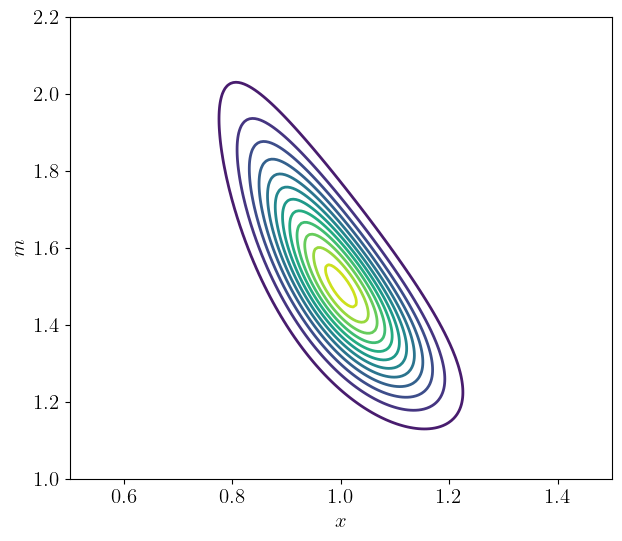

In [19]:
def plot_contours_of_p(X, Y, sigma_x, sigma_y,
                       x_range=(-5, 5), m_range=(-5, 5),
                       num_points=200):
    # Create the grid
    x_vals = np.linspace(x_range[0], x_range[1], num_points)
    m_vals = np.linspace(m_range[0], m_range[1], num_points)
    X_grid, M_grid = np.meshgrid(x_vals, m_vals)

    # Evaluate p(x,m|X,Y) on the grid
    f_vals = p_of_xm_given_XY(X_grid, M_grid, X, Y, sigma_x, sigma_y)

    # Plot contours
    plt.figure(figsize=(7, 6))
    contour = plt.contour(X_grid, M_grid, f_vals, levels=15, cmap='viridis')
    # plt.colorbar(contour, label='p(x,m|X,Y)')

    plt.xlabel('$x$')
    plt.ylabel('$m$')
    plt.savefig(dir+'BHM_joint_posterior.pdf',dpi=300,bbox_inches="tight",transparent=True)
    plt.savefig(dir+'BHM_joint_posterior.png',dpi=100,bbox_inches="tight")
    plt.show()

plot_contours_of_p(X=X, Y=Y, sigma_x=sigma_x, sigma_y=sigma_y,
                       x_range=(0.5, 1.5), m_range=(1, 2.2), num_points=200)

In [20]:
def p_of_m_given_XYx(m,X,Y,x,sigma_x,sigma_y):
  return norm.pdf(m, loc=Y/x, scale=np.sqrt(sigma_y**2/x**2))

def p_of_x_given_XYm(x,m,X,Y,sigma_x,sigma_y):
  return norm.pdf(x, loc=(sigma_y**2*X+m*sigma_x**2*Y)/(sigma_y**2+m**2*sigma_x**2), scale=np.sqrt((sigma_y**2*sigma_x**2)/(sigma_y**2+m**2*sigma_x**2)))

In [21]:
def gibbs_sampler(X, Y, sigma_x, sigma_y, n_iter=10000,
                  start_x=1.0, start_m=1.0):
    # Arrays to store the samples
    x_samples = np.zeros(n_iter)
    m_samples = np.zeros(n_iter)

    # Initialize
    x_current = start_x
    m_current = start_m

    for i in range(n_iter):

        # -----------------------
        # 1) Sample m | x, X, Y
        # -----------------------
        mean_m = Y / x_current
        std_m  = sigma_y / abs(x_current)

        m_current = np.random.normal(mean_m, std_m)

        # -----------------------
        # 2) Sample x | m, X, Y
        # -----------------------
        mean_x = (sigma_y**2 * X + m_current * sigma_x**2 * Y) \
                 / (sigma_y**2 + m_current**2 * sigma_x**2)
        var_x  = (sigma_y**2 * sigma_x**2) \
                 / (sigma_y**2 + m_current**2 * sigma_x**2)
        std_x  = var_x**0.5

        x_current = np.random.normal(mean_x, std_x)

        # Store the samples
        x_samples[i] = x_current
        m_samples[i] = m_current

    return x_samples, m_samples

n_samples = 300

x_chain, m_chain = gibbs_sampler(X, Y, sigma_x, sigma_y,
                                n_iter=n_samples,
                                start_x=1.0, start_m=1.5)

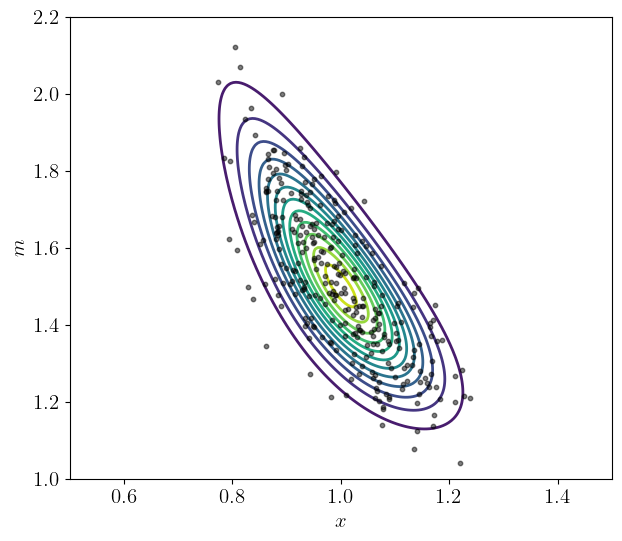

In [22]:
def plot_contours_and_samples_of_p(x_chain, m_chain, X, Y, sigma_x, sigma_y,
                       x_range=(-5, 5), m_range=(-5, 5),
                       num_points=200):
    # Create the grid
    x_vals = np.linspace(x_range[0], x_range[1], num_points)
    m_vals = np.linspace(m_range[0], m_range[1], num_points)
    X_grid, M_grid = np.meshgrid(x_vals, m_vals)

    # Evaluate p(x,m|X,Y) on the grid
    f_vals = p_of_xm_given_XY(X_grid, M_grid, X, Y, sigma_x, sigma_y)

    # Plot contours
    plt.figure(figsize=(7, 6))
    contour = plt.contour(X_grid, M_grid, f_vals, levels=15, cmap='viridis')
    # plt.colorbar(contour, label='p(x,m|X,Y)')

    # Plot the (x,m) samples to see the joint distribution
    plt.scatter(x_chain, m_chain, color='black', alpha=0.5, s=10, zorder=2)

    plt.xlabel('$x$')
    plt.ylabel('$m$')
    plt.savefig(dir+'BHM_joint_posterior_sampling.pdf',dpi=300,bbox_inches="tight",transparent=True)
    plt.savefig(dir+'BHM_joint_posterior_sampling.png',dpi=100,bbox_inches="tight")
    plt.show()

plot_contours_and_samples_of_p(x_chain,m_chain, X=X, Y=Y, sigma_x=sigma_x, sigma_y=sigma_y,
                       x_range=(0.5, 1.5), m_range=(1, 2.2), num_points=200)

### Posterior predictive test

In [23]:
# Posterior predictive test
n_pred = 20
X_pred = np.random.normal(x_chain[-n_pred:], sigma_x)
Y_pred = np.random.normal(m_chain[-n_pred:]*x_chain[-n_pred:], sigma_y)
X_pred, Y_pred

(array([0.79168976, 0.89164841, 0.8530191 , 1.00941949, 0.88272222,
        0.81985621, 0.95006755, 0.75899122, 0.93523899, 0.98720135,
        0.89024111, 1.01454986, 1.13115077, 1.16970815, 0.848147  ,
        0.94313067, 0.90545842, 0.95859367, 1.09138578, 0.86162333]),
 array([1.62166617, 1.32177828, 1.54770874, 1.56841895, 1.5134472 ,
        1.18787615, 1.66724512, 1.71237235, 1.39456061, 1.64702749,
        1.23190899, 1.45208781, 1.39647362, 1.44263475, 1.10412917,
        1.6886685 , 1.33152792, 1.6468359 , 1.59998244, 1.6230078 ]))

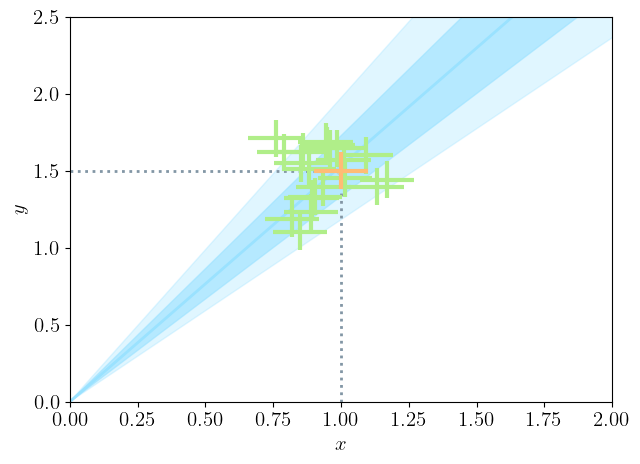

In [24]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.set_xlim(0, X+1)
ax.set_ylim(0, Y+1)
ax.plot([0.,X],[Y,Y], ls=':', color='#8296a5', linewidth=2)
ax.plot([X,X],[0.,Y], ls=':', color='#8296a5', linewidth=2)
ax.scatter([X], [Y], ls='', color='#ffbc75', linewidth=2)
ax.plot([0,4.],[0,4.*m_mean], color="#9ae2ff", lw=2)
ax.fill_between([0,4.],[0,4.*m_lower_68],[0,4.*m_upper_68], color="#9ae2ff", alpha=0.6)
ax.fill_between([0,4.],[0,4.*m_lower_95],[0,4.*m_upper_95], color="#9ae2ff", alpha=0.3)
ax.errorbar(X_pred, Y_pred, xerr=sigma_x, yerr=sigma_y, ls='', ms=100, color='#b0ee89', linewidth=3)
ax.errorbar([X], [Y], xerr=sigma_x, yerr=sigma_y, ls='', ms=100, color='#ffbc75', linewidth=3)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.savefig(dir+'PPT_oldx.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig(dir+'PPT_oldx.png',dpi=100,bbox_inches="tight")
plt.show()

In [25]:
xtilde_array = np.array([0.25, 1.25, 1.75])

In [26]:
# Define the integrand as a function of m.
def integrand(m, Ytilde, xtilde, X, Y, sigma_y, sigma_x):
    # Likelihood for the new observation at (xtilde, Ytilde)
    term1 = np.exp(-0.5 * ((Ytilde - m * xtilde) ** 2) / (sigma_y ** 2)) / np.sqrt(2 * np.pi * sigma_y ** 2)

    # The posterior term for m coming from the observed (X, Y)
    denom = sigma_y ** 2 + (m ** 2) * (sigma_x ** 2)
    term2 = np.exp(-0.5 * ((Y - m * X) ** 2) / denom) / np.sqrt(denom)

    return term1 * term2

# Function to compute the predictive (unnormalized) density at Ytilde for a given xtilde.
def predictive_unnormalized(Ytilde, xtilde, X, Y, sigma_y, sigma_x):
    result, error = quad(integrand, -np.inf, np.inf, args=(Ytilde, xtilde, X, Y, sigma_y, sigma_x))
    return result

# Function to compute the normalized predictive pdf and credible intervals.
def compute_predictive(xtilde, X, Y, sigma_y, sigma_x, Ytilde_min, Ytilde_max, num_points=1000):
    # Create a grid of Ytilde values over which to evaluate the pdf.
    Ytilde_grid = np.linspace(Ytilde_min, Ytilde_max, num_points)

    # Compute the unnormalized predictive density for each Ytilde on the grid.
    unnormalized_pdf = np.array([predictive_unnormalized(Yt, xtilde, X, Y, sigma_y, sigma_x) for Yt in Ytilde_grid])

    # Compute the normalization constant using a numerical integration (trapezoidal rule).
    norm_const = np.trapz(unnormalized_pdf, Ytilde_grid)
    normalized_pdf = unnormalized_pdf / norm_const

    return Ytilde_grid, normalized_pdf

def compute_credible(Ytilde_grid, normalized_pdf, num_points=1000):
    # Compute the cumulative distribution function (CDF). Make sure the grid is sorted.
    cdf = np.cumsum(normalized_pdf)
    cdf = cdf / cdf[-1]  # Normalize the CDF properly (should be nearly 1 at the end)

    # Alternatively, we can compute the CDF using the trapezoidal integration.
    # cdf = cumtrapz(normalized_pdf, Ytilde_grid, initial=0)
    # cdf = cdf / cdf[-1]

    # Find the quantiles corresponding to the desired credible intervals.
    def find_quantile(q):
        return np.interp(q, cdf, Ytilde_grid)

    # For a 68% credible interval (central), one typical choice is to remove 16% on each tail.
    lower_68 = find_quantile(0.16)
    upper_68 = find_quantile(0.84)

    # For a 95% credible interval (central), remove 2.5% on each tail.
    lower_95 = find_quantile(0.025)
    upper_95 = find_quantile(0.975)

    return (lower_68, upper_68), (lower_95, upper_95)

In [27]:
xtilde_grid = np.linspace(0.0, 2.0, 200)
y_lower_68, y_upper_68 = [], []
y_lower_95, y_upper_95 = [], []
for xtilde in xtilde_grid:
    Ytilde_grid, normalized_pdf = compute_predictive(
        xtilde, X, Y, sigma_y, sigma_x, -1.0, 3.5, num_points=100)
    (lower_68, upper_68), (lower_95, upper_95) = compute_credible(Ytilde_grid, normalized_pdf, num_points=100)
    y_lower_68.append(lower_68)
    y_upper_68.append(upper_68)
    y_lower_95.append(lower_95)
    y_upper_95.append(upper_95)

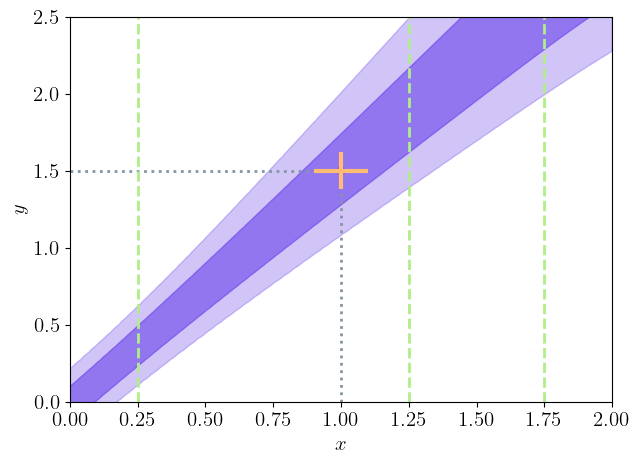

In [28]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.set_xlim(0, X+1)
ax.set_ylim(0, Y+1)
ax.plot([0.,X],[Y,Y], ls=':', color='#8296a5', linewidth=2)
ax.plot([X,X],[0.,Y], ls=':', color='#8296a5', linewidth=2)
ax.scatter([X], [Y], ls='', color='#ffbc75', linewidth=2)
ax.fill_between(xtilde_grid, y_lower_68, y_upper_68, color="#6941eb", alpha=0.6)
ax.fill_between(xtilde_grid, y_lower_95, y_upper_95, color="#6941eb", alpha=0.3)
ax.errorbar([X], [Y], xerr=sigma_x, yerr=sigma_y, ls='', ms=100, color='#ffbc75', linewidth=3)
for xtilde in xtilde_array:
  ax.axvline(xtilde, color='#b0ee89', linestyle='--', lw=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.savefig(dir+'PPT_newx_slope.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig(dir+'PPT_newx_slope.png',dpi=100,bbox_inches="tight")
plt.show()

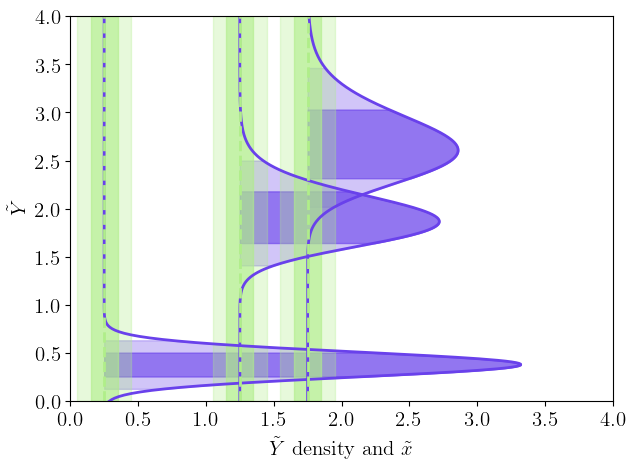

In [29]:
# Define the range for Ytilde
Ytilde_min = 0.0
Ytilde_max = 4.0

# Create a figure and an axis.
fig, ax = plt.subplots(figsize=(7, 5))
ax.set_xlim(0, 4)  # Adjust as needed so that the plotted densities have room.
ax.set_ylim(Ytilde_min, Ytilde_max)  # Adjust as needed so that the plotted densities have room.

# Loop over the xtilde values you want to show.
for xtilde in xtilde_array:
    # Obtain the predictive density.
    Ytilde_grid, normalized_pdf = compute_predictive(
        xtilde, X, Y, sigma_y, sigma_x, Ytilde_min, Ytilde_max, num_points=500)

    # Plot the predictive density horizontally.
    # We shift the predictive density by xtilde so that its center is aligned with xtilde.
    ax.plot(xtilde + normalized_pdf, Ytilde_grid, color='#6941eb', lw=2)

    # Shade the credible regions.
    (lower_68, upper_68), (lower_95, upper_95) = compute_credible(Ytilde_grid, normalized_pdf, num_points=100)
    foo=np.where((Ytilde_grid>lower_68)*(Ytilde_grid<upper_68))[0]
    ax.fill_betweenx(Ytilde_grid[foo], xtilde*np.ones_like(Ytilde_grid[foo]), (xtilde + normalized_pdf)[foo], color="#6941eb", alpha=0.6)
    foo=np.where((Ytilde_grid>lower_95)*(Ytilde_grid<upper_95))[0]
    ax.fill_betweenx(Ytilde_grid[foo], xtilde*np.ones_like(Ytilde_grid[foo]), (xtilde + normalized_pdf)[foo], color="#6941eb", alpha=0.3)

    # Draw a vertical dashed line at the xtilde value.
    ax.axvline(xtilde, color='#b0ee89', linestyle='--', lw=2)

    # Fill region
    ax.fill_between([xtilde-sigma_x,xtilde+sigma_x], [0.,0.], [Ytilde_max,Ytilde_max], color='#b0ee89', alpha=0.6)
    ax.fill_between([xtilde-2*sigma_x,xtilde+2*sigma_x], [0.,0.], [Ytilde_max,Ytilde_max], color='#b0ee89', alpha=0.3)

# Set labels: now x corresponds to (xtilde + density offset) and y is Ytilde.
ax.set_xlabel(r"$\tilde{Y}$ density and $\tilde{x}$")
ax.set_ylabel(r"$\tilde{Y}$")
plt.savefig(dir+'PPT_newx_marginals.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig(dir+'PPT_newx_marginals.png',dpi=100,bbox_inches="tight")
plt.show()

## Information and entropy

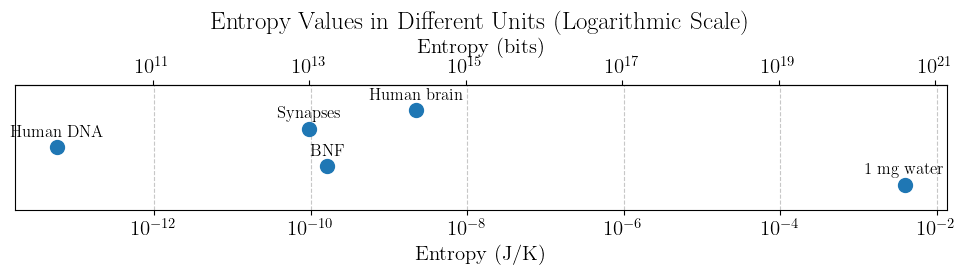

In [30]:
# Constants
k_B = 1.380649e-23  # Boltzmann constant in J/K
ln2 = np.log(2)
conversion_factor = k_B * ln2  # J/K per bit

# Data (names, entropy in J/K and the reported bits; the bits can be recovered via S/(k_B ln2))
data = [
    {"name": "1 mg water",   "S_JK": 3.89e-3,   "bits": 4.06e20},
    {"name": "BNF",          "S_JK": 1.6e-10,   "bits": 1.67e13},
    {"name": "Human DNA",    "S_JK": 5.7e-14,   "bits": 5.95e9},
    {"name": "Synapses",     "S_JK": 9.57e-11,  "bits": 1e13},
    {"name": "Human brain",  "S_JK": 2.22e-9,   "bits": 2.32e14}
]

# Extract data arrays
names = [d["name"] for d in data]
S_JK = np.array([d["S_JK"] for d in data])
# We compute bits directly from S_JK (they should match the provided bits)
S_bits = S_JK / conversion_factor

# For visualization, we assign arbitrary y-coordinates just to separate the markers.
y = np.linspace(0.2, 0.8, len(data))

# Create the figure and main axis.
fig, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(0, 1)  # Set y-limits to fit the data points.

# Plot the data points on a logarithmic x-axis.
ax.scatter(S_JK, y, color='C0', s=100, zorder=3)
for xi, yi, name in zip(S_JK, y, names):
    ax.text(xi, yi+0.09, name, ha='center', fontsize=12)

# Set the x-axis (entropy in J/K) to logarithmic scale.
ax.set_xscale('log')
ax.set_xlabel('Entropy (J/K)')
ax.set_yticks([])  # remove y-axis ticks since they have no physical meaning here.
ax.grid(which='both', axis='x', linestyle='--', alpha=0.7)

# Create a secondary x-axis for bits.
# The conversion is: bits = (J/K) / (k_B ln2) and the inverse is: (J/K) = bits * (k_B ln2)
secax = ax.secondary_xaxis('top', functions=(lambda x: x/conversion_factor,
                                                lambda b: b * conversion_factor))
secax.set_xlabel('Entropy (bits)')

# Optionally adjust tick formatting if needed.
plt.title('Entropy Values in Different Units (Logarithmic Scale)')
plt.tight_layout()
plt.savefig(dir+'information_and_entropy.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig(dir+'information_and_entropy.png',dpi=100,bbox_inches="tight")
plt.show()